In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

%matplotlib inline

In [6]:
K = 3 #number of clusters
D = 2 #number of dimensions
N = 1000 #number of data points
Ns = [300, 400, 300] #number of data point clusters

means = 5 * np.random.randn(K, D) #centers/centroids
x = []
for n, m in zip(Ns, means):
    print(n, m)
    x.append(np.random.randn(n, D) + m) #for each mean, create and n by D matrix and add to it

300 [ 2.48357077 -0.69132151]
400 [3.23844269 7.61514928]
300 [-1.17076687 -1.17068478]


In [7]:
means #the centers of the clusters

array([[ 2.48357077, -0.69132151],
       [ 3.23844269,  7.61514928],
       [-1.17076687, -1.17068478]])

In [8]:
[x_.shape for x_ in x] #the dimension for each data point is 2 dimensions

[(300, 2), (400, 2), (300, 2)]

In [9]:
m

array([-1.17076687, -1.17068478])

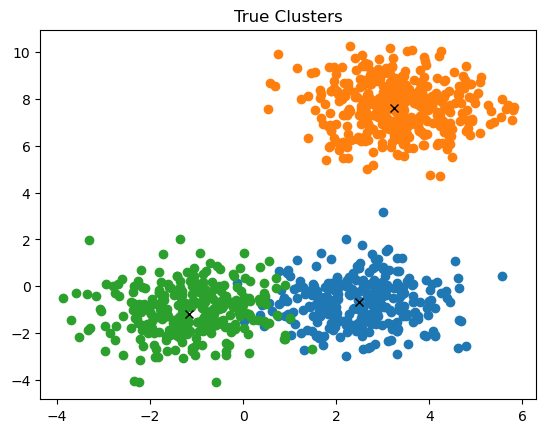

In [10]:
for x_, m in zip(x, means):
    plt.scatter(x_[:, 0], x_[:, 1])
    plt.plot(m[0], m[1], 'kx')
plt.title('True Clusters')
plt.show()

In [ ]:
data = np.vstack(x)
plt.scatter(data[:, 0], data[])